In [16]:
#pip install opencv-python

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt
import requests
import numpy as np

In [18]:
#image_url = 'https://iiif.universiteitleiden.nl/iiif/2/hdl:1887.1%252Fitem:3480690/full/full/0/default.jpg'
image_url = 'https://images.artsmia.org/wp-content/uploads/2021/03/16094911/7348-768x1160.jpg'
#image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Piet_Mondriaan_Victory_Boogie_Woogie.jpg/1280px-Piet_Mondriaan_Victory_Boogie_Woogie.jpg'
#image_url = 'https://iiif.universiteitleiden.nl/iiif/2/hdl:1887.1%252Fitem:291344/full/full/0/default.jpg'
#image_url = 'https://iiif.universiteitleiden.nl/iiif/2/hdl:1887.1%252Fitem:1597519/full/full/0/default.jpg'
#image_url = 'https://iiif.universiteitleiden.nl/iiif/2/hdl:1887.1%252Fitem:1678957/full/full/0/default.jpg'

In [19]:
def download_image(img_url,file_name):
    response = requests.get(img_url)
    if response:
        out = open( file_name , 'wb' )
        out.write(response.content)
        out.close()
        

def show_image(image,caption='Default',width=10,height=12,dim=3):    
      
    plt.figure(figsize=(width,height))
    if dim == 3:
        img2 = image[:,:,::-1]
    if dim == 1:
        img2 = image[:,:]
    plt.imshow(img2)
    plt.title(caption)
    plt.margins(x=0)
    plt.axis('off') 
    plt.show()

        
download_image(image_url,'img.jpg')
    

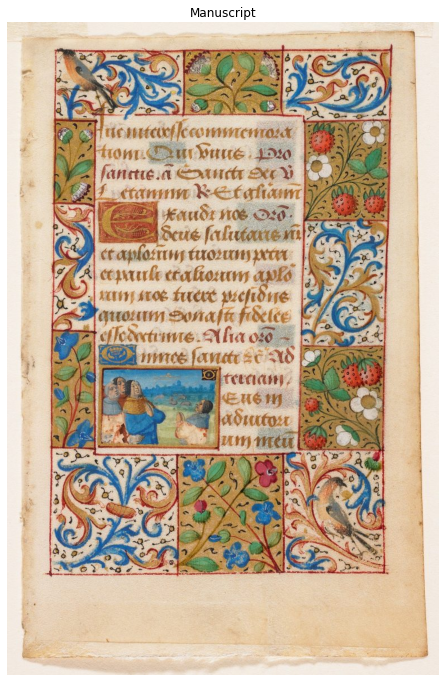

In [20]:
img = cv.imread('img.jpg')
show_image(img,'Manuscript')

In [21]:
extent = np.shape(img)
print( f'Width: {extent[0]}' )
print( f'Height: {extent[1]}' )
print( f'Number of layers: {extent[2]}\n' )
print( f'Total number of pixels: {extent[0]*extent[1]*extent[2]}')

Width: 1160
Height: 768
Number of layers: 3

Total number of pixels: 2672640


In [22]:
print(img)

[[[191 213 225]
  [195 217 229]
  [200 222 234]
  ...
  [229 238 241]
  [230 240 240]
  [230 240 240]]

 [[197 219 231]
  [197 219 231]
  [198 220 232]
  ...
  [228 237 240]
  [228 238 238]
  [228 238 238]]

 [[201 223 235]
  [199 221 233]
  [196 218 230]
  ...
  [227 236 239]
  [227 236 239]
  [226 235 238]]

 ...

 [[226 235 244]
  [225 234 243]
  [225 234 243]
  ...
  [223 232 242]
  [224 233 243]
  [224 233 243]]

 [[224 233 242]
  [224 233 242]
  [223 232 241]
  ...
  [222 231 241]
  [223 232 242]
  [223 232 242]]

 [[225 234 243]
  [225 234 243]
  [226 235 244]
  ...
  [221 230 240]
  [222 231 241]
  [222 231 241]]]


## Extract the separate colour layers

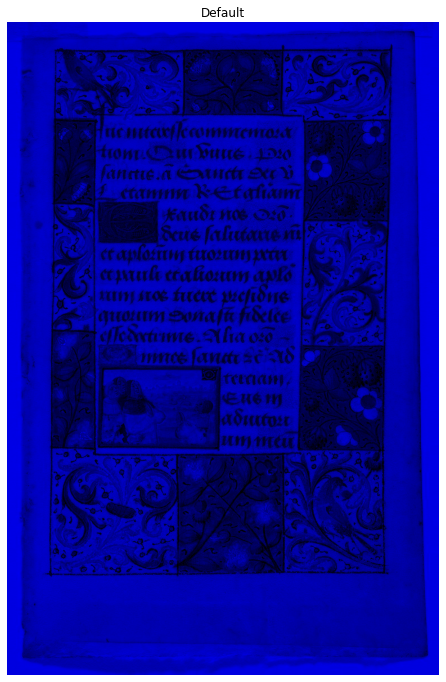

In [23]:
B,G,R = cv.split(img)
zeros = np.zeros(img.shape[:2], dtype = 'uint8')

new_image = cv.merge( [B , zeros, zeros] )
show_image(new_image)

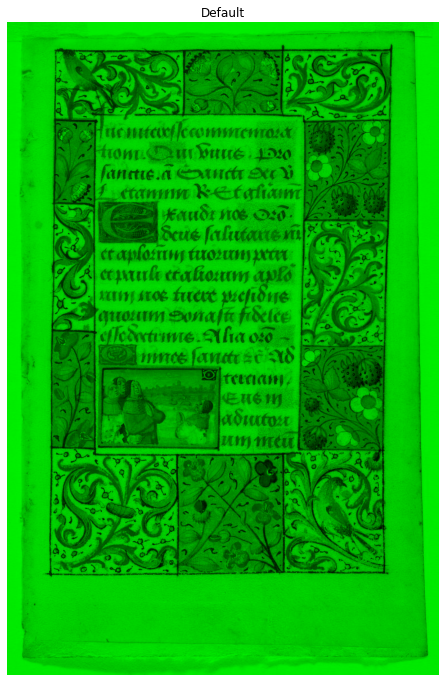

In [24]:
new_image = cv.merge( [zeros , G, zeros] )
show_image(new_image)

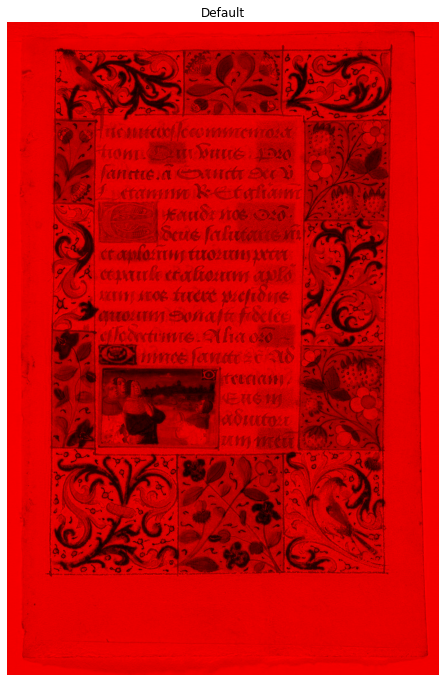

In [25]:
new_image = cv.merge( [zeros , zeros, R] )
show_image(new_image)

## Extract shades of red

In [26]:
def apply_mask_red(img,lower,upper):

    img_hsv=cv.cvtColor(img, cv.COLOR_BGR2HSV)

    # lower mask 
    lower_mask = np.array([lower[0],50,50])
    upper_mask = np.array([lower[1],255,255])
    mask0 = cv.inRange(img_hsv, lower_mask, upper_mask)

    # upper mask
    lower_mask = np.array([upper[0],50,50])
    upper_mask = np.array([upper[1],255,255])
    mask1 = cv.inRange(img_hsv, lower_mask, upper_mask)

    # join lower and upper masks
    mask = mask0+mask1

    # set pixels to 0 except mask
    output_img = img.copy()
    output_img[np.where(mask==0)] = 0
    return output_img


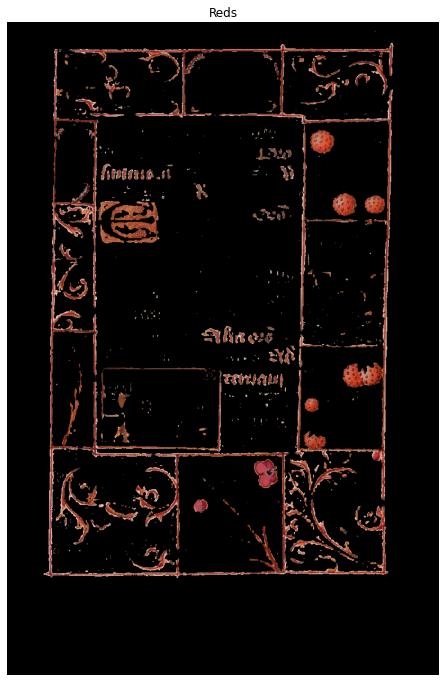

In [27]:
red_image = apply_mask_red(img,[0,10],[170,180])
show_image(red_image,'Reds')

## Shades of blue

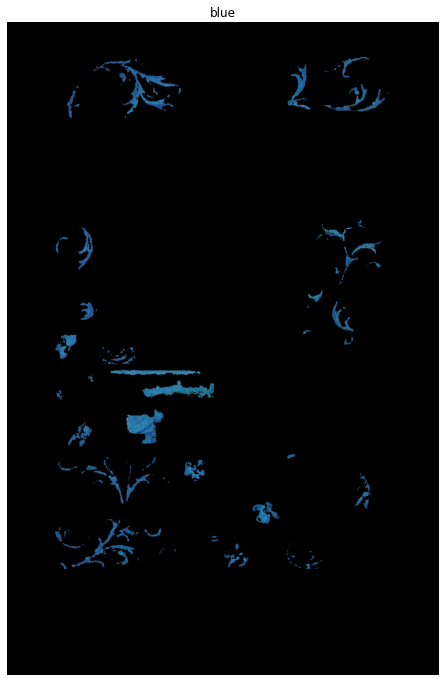

In [28]:
def apply_mask(img,lower,upper):
    img_hsv=cv.cvtColor(img, cv.COLOR_BGR2HSV)

    lower_blue = np.array(lower)
    upper_blue = np.array(upper)

    mask = cv.inRange(img_hsv, lower_blue, upper_blue)
    
    
    #mask = cv2.inRange(hsv, lower_blue, upper_blue) 
  
    # The bitwise and of the frame and mask is done so  
    # that only the blue coloured objects are highlighted  
    # and stored in res 
    output_img = cv.bitwise_and(img,img, mask= mask) 

#     output_img = img.copy()
#     output_img[np.where(mask==0)] = 0
    return output_img


blue_image = apply_mask(img,[78,158,124],[138,255,255])
show_image(blue_image,'blue')

## Shades of green

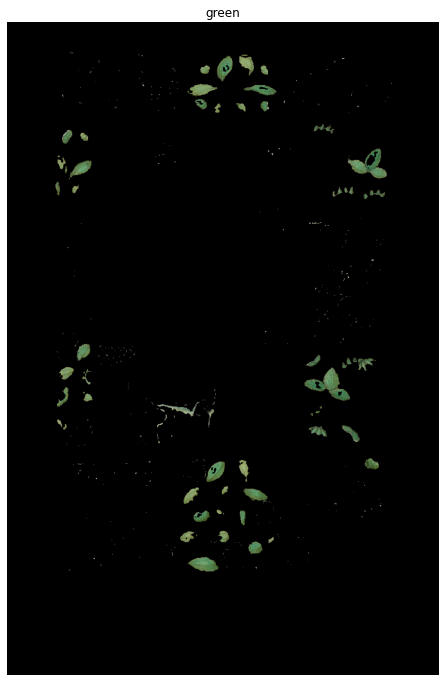

In [29]:
green_image = apply_mask(img,[36,25,25],[70,255,255])
show_image(green_image,'green')


In [30]:
#yellow_image = apply_mask(img,[22, 93, 0],[45, 255, 255])